In [1]:
!pip install aicrowd-cli

%load_ext aicrowd.magic
%aicrowd login
!rm -rf data
!mkdir data
%aicrowd ds dl -c docking-iss -o data
!unzip data/train.zip -d data/train > /dev/null
!unzip data/val.zip -d data/val > /dev/null
!unzip data/test.zip -d data/test > /dev/null


     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 170 kB 21.3 MB/s 
     |████████████████████████████████| 208 kB 23.5 MB/s 
     |████████████████████████████████| 62 kB 773 kB/s 
     |████████████████████████████████| 76 kB 4.5 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 51 kB 6.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requ

submission.csv:   0%|          | 0.00/267k [00:00<?, ?B/s]

test.zip:   0%|          | 0.00/75.1M [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/217k [00:00<?, ?B/s]

train.zip:   0%|          | 0.00/150M [00:00<?, ?B/s]

val.csv:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

val.zip:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

In [2]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import os 

In [3]:
train_df = pd.read_csv('/content/data/train.csv')

In [4]:
train_df.head()

,ImageID,distance,location
0,0,351,"[215, 158]"
1,1,372,"[228, 269]"
2,2,488,"[255, 386]"
3,3,308,"[306, 426]"
4,4,67,"[248, 338]"


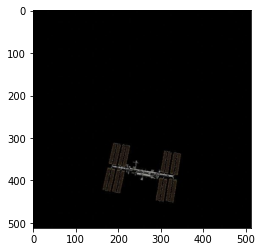

In [5]:
plt.imshow(plt.imread("/content/data/train/"+ str(train_df.ImageID[2]) + '.jpg'))

In [6]:
from pathlib import Path

In [7]:
def change_df_column(df, path= "/content/data/train/", extension  ='.jpg'):
  df = df.copy()
  for num,x in enumerate(df.ImageID): 
    df.ImageID[num]= path + str(x) + extension 
  for num, location in enumerate(df.location.apply(eval)):
    df['location_x'] = location[0]
    df['location_y'] = location[1]
  return df 


In [8]:
train_df_mod = change_df_column(train_df)
train_df_mod.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,ImageID,distance,location,location_x,location_y
0,/content/data/train/0.jpg,351,"[215, 158]",286,464
1,/content/data/train/1.jpg,372,"[228, 269]",286,464
2,/content/data/train/2.jpg,488,"[255, 386]",286,464
3,/content/data/train/3.jpg,308,"[306, 426]",286,464
4,/content/data/train/4.jpg,67,"[248, 338]",286,464


In [9]:
val_df = pd.read_csv('/content/data/val.csv')
val_df.head()

,ImageID,distance,location
0,0,202,"[226, 478]"
1,1,249,"[221, 276]"
2,2,403,"[212, 275]"
3,3,166,"[211, 195]"
4,4,437,"[231, 62]"


In [10]:
val_df_mod = change_df_column(df = val_df, path = '/content/data/val/', extension = '.jpg')
val_df_mod.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,ImageID,distance,location,location_x,location_y
0,/content/data/val/0.jpg,202,"[226, 478]",316,408
1,/content/data/val/1.jpg,249,"[221, 276]",316,408
2,/content/data/val/2.jpg,403,"[212, 275]",316,408
3,/content/data/val/3.jpg,166,"[211, 195]",316,408
4,/content/data/val/4.jpg,437,"[231, 62]",316,408


In [11]:
def check_paths(df):
  does_not_exists = 0 
  for paths in df.ImageID:
    if not Path(paths).exists():
      does_not_exists += 1 

  if does_not_exists == 0 : 
    return True 
  else :
    return False, does_not_exists

In [12]:
check_paths(train_df_mod)

True

In [13]:
check_paths(val_df_mod)

True

In [14]:
str(train_df_mod.ImageID[0])

'/content/data/train/0.jpg'

In [15]:
train_images = tf.data.Dataset.from_tensor_slices(train_df_mod.ImageID)
train_labels = tf.data.Dataset.from_tensor_slices((train_df_mod.distance, train_df_mod.location_x, train_df_mod.location_y))

In [29]:
val_images = tf.data.Dataset.from_tensor_slices(val_df_mod.ImageID)
val_labels = tf.data.Dataset.from_tensor_slices((val_df_mod.distance, val_df_mod.location_x,val_df_mod.location_y))

In [16]:
def get_images(paths): 
  image = tf.io.read_file(paths)
  image = tf.io.decode_image(image)
  image = tf.keras.preprocessing.image.smart_resize(image, size = (512,512))
  return image

In [17]:
train_images = train_images.map(get_images, num_parallel_calls=tf.data.AUTOTUNE)

In [30]:
val_images = val_images.map(get_images, num_parallel_calls= tf.data.AUTOTUNE)

In [18]:
train_dataset = tf.data.Dataset.zip((train_images,train_labels))

In [31]:
val_dataset = tf.data.Dataset.zip((val_images,val_labels))

In [19]:
train_dataset

<ZipDataset shapes: ((512, 512, None), ((), (), ())), types: (tf.float32, (tf.int64, tf.int64, tf.int64))>

In [20]:
train_dataset.element_spec

(TensorSpec(shape=(512, 512, None), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.int64, name=None),
  TensorSpec(shape=(), dtype=tf.int64, name=None),
  TensorSpec(shape=(), dtype=tf.int64, name=None)))

In [37]:
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [21]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [34]:
val_dataset.element_spec

(TensorSpec(shape=(512, 512, None), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.int64, name=None),
  TensorSpec(shape=(), dtype=tf.int64, name=None),
  TensorSpec(shape=(), dtype=tf.int64, name=None)))

In [22]:
import tensorflow_hub as hub

In [23]:
base_model_resnet_layer = hub.KerasLayer('https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/5',input_shape = (512,512,3),trainable = False)

In [24]:
base_model_resnet_layer.trainable = False

In [25]:
inputs = tf.keras.layers.Input(shape = (512,512,3))
x = base_model_resnet_layer(inputs)
outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)

model = tf.keras.Model(inputs,outputs)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 1001)              55875273  
_________________________________________________________________
dense (Dense)                (None, 3)                 3006      
Total params: 55,878,279
Trainable params: 3,006
Non-trainable params: 55,875,273
_________________________________________________________________


In [27]:
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae', 'mse'])

In [28]:
model_history = model.fit(train_dataset, epochs = 10)

Epoch 1/10
313/313 [==============================] - 735s 2s/step - loss: 282.1317 - mae: 282.1317 - mse: 94153.2578
Epoch 2/10
313/313 [==============================] - 684s 2s/step - loss: 282.1317 - mae: 282.1317 - mse: 94153.2578
Epoch 3/10
313/313 [==============================] - 684s 2s/step - loss: 282.1317 - mae: 282.1317 - mse: 94153.2578
Epoch 4/10
313/313 [==============================] - 685s 2s/step - loss: 282.1317 - mae: 282.1317 - mse: 94153.2578
Epoch 5/10
313/313 [==============================] - 685s 2s/step - loss: 282.1317 - mae: 282.1317 - mse: 94153.2578
Epoch 6/10
313/313 [==============================] - 684s 2s/step - loss: 282.1317 - mae: 282.1317 - mse: 94153.2578
Epoch 7/10
313/313 [==============================] - 684s 2s/step - loss: 282.1317 - mae: 282.1317 - mse: 94153.2578
Epoch 8/10
313/313 [==============================] - 684s 2s/step - loss: 282.1317 - mae: 282.1317 - mse: 94153.2578
Epoch 9/10
313/313 [==============================] - 68

In [38]:
model.evaluate(val_dataset)

32/32 [==============================] - 74s 2s/step - loss: 277.1516 - mae: 277.1516 - mse: 92193.4844


[277.151611328125, 277.151611328125, 92193.484375]